# Lab 6 BF550 Fall 2022

Today, we will use your new understanding of probability distributions to generate data and then learn more about plotting aesthetics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps

# 1. The shape of the Poisson distribution

Here is the probability mass function for the Poisson distribution,

$$f(k;\lambda)=P(X=k)=\frac{\lambda ^k \exp(-\lambda)}{k!}$$

Which describes the probability of the number of occurences, $k$, given an average number of events, $\lambda$. $\lambda$ can be computed given an average rate $p$ (units of occurences/population size) and population size $n$, $\lambda=np$ (units: occurences = occurences/size * size).


Task: On one figure
1. Plot the PMF of the Poisson distribution for $\lambda\in\{1,5\}$ for $k \in\{0, 15\}$.<br>
  a. Color each PMF by it's $\lambda$ (Hint: matplotlib will automatically choose a new color for each line if multiple lines are plotted on the same `figure` one after another.)<br>
  b. Show circle markers on each line<br>
  c. Make the lines a bit thicker. 
2. Create a legend with a title (check out the `label` parameter in `plt.plot()`)
3. Label the axes
4. Make the figure bigger (like 8 by 6 for example).

*Complete each of these tasks one at a time. Be sure you are getting what you expect before adding more complexity.*

Here, we are effectively remaking the plot from the [Poisson Wikipedia page](https://en.wikipedia.org/wiki/Poisson_distribution).

In [ ]:
"Poisson distribution of a range of k"
lambdas = None
k = None

plt.show()

## Answer

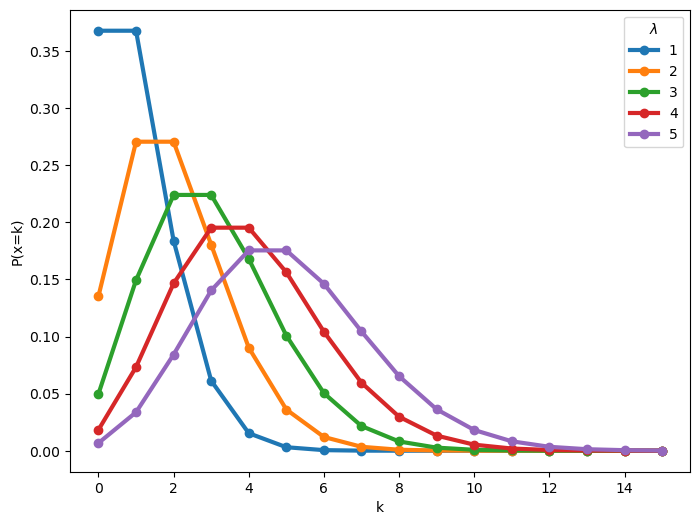

In [ ]:
"Poisson distribution"
lambdas = range(1, 6)
k = range(16)

# Change the figure size
plt.figure(figsize=(8, 6))

# For each lambda, plot the PMF
for lam in lambdas:
    pmf = sps.poisson.pmf(k, lam)
    plt.plot(k, pmf, label=lam, marker='o', lw=3)
plt.xlabel('k')
plt.ylabel('P(x=k)')
plt.legend(title='$\lambda$')
plt.show()

# 2. Generate count data

Dunkin' is trying to evaluate whether it's worth it to keep it's stores open between 3-4am. To do this, they will collect data (aka, you will generate data 😉) over 15 days on how many people enter 6 different stores between 3-4am. The stores are from two different states and in each state there are three location types (rural, suburban, and urban). While the Dunkin' execs don't know this (yet), the average rate of Dunkin' attendance between 3-4am nationwide is 0.0002 vists/population size. The population sizes of the different locations are:

| Location | State |Population size |
| --- | --- |---|
| Rural| 0 | 5000 |
| Rural |1 | 5500 |
| Suburb |0 |  15000 |
| Suburb| 1| 16000 |
| Urban| 0 | 50000 |
| Urban| 1 | 60000 |

Task:
1. Compute the average number of visits between 3-4am for each location.
1. Generate count data for the number of people that visit each of these 6 locations over 15 days of observation (rows=trials (or days), columns=locations, where each location is a location type in a state, ex. `rural_state0`, `rural_state1`, etc.)
2. Place that data in a Pandas dataframe and name each column in a meaningful way
3. Display the first five rows

In [ ]:
"Average number of visits"
lambdas = None

In [ ]:
"Generate data"
days = None
# Sample from a distribution for all days and each lambda
count_data = None

In [ ]:
"Place in a DataFrame"
# Generate meaningful column names for each location
locations = None
# Construct a wideform DataFrame
counts = None
# Display the first 5 rows
counts.head()

AttributeError: 'NoneType' object has no attribute 'head'

## Answer

In [ ]:
"Generate data"
days = 15
# Three sets of two lambdas
lambdas = np.array([5000, 5500, 15000, 16000, 50000, 60000]) * 0.0002
# Sample poisson for all trials and each lambda
counts = np.random.poisson(lambdas, (days, len(lambdas)))

"Place in DataFrame"
# Generate column names for each location
locations = [f'{l}_s{i}' for l in ['rural', 'suburb', 'urban'] for i in range(2)]

counts = pd.DataFrame(counts, columns=locations)
counts.head()

,rural_s0,rural_s1,suburb_s0,suburb_s1,urban_s0,urban_s1
0,0,0,4,4,6,12
1,1,1,2,3,12,11
2,1,3,4,3,11,19
3,0,1,8,3,10,16
4,0,1,1,4,11,10


# 3. Prepare the data for categorical data visualization

In order for Dunkin' to make it's decision about store hours, they'll be interested in how many people are visiting stores between 3-4am, but also what factors might be influencing customer visits. In this analysis, for example, they may be interested in if location type (rural, suburban, or urban) plays a role or if the state that the store is in is playing a role. In order to investigate this, it will be helpful to visualize the data. 

Since we are working with categorical data here, let's use Seaborn! In order to use Seaborn on this data, we will want to transform the data so all of the data we want to rerference in a visualization has it's own column in a longform DataFrame.

Task: Transform `counts` so there's a column for `day`, `location` (ex. `rural_state0`), `location_type` (ex. `rural`), `state` (ex. `state0`), and `counts`.

In [ ]:
"Transform data"
## WORK ON THIS IN PIECES. DO ONE STEP, THEN DISPLAY THE OUTPUT, THEN MOVE TO THE NEXT STEP TO MAKE SURE YOU'RE DOING EVERYTHING CORRECTLY
# Hint: We are going to longform, we can use `stack`. We probably want to rename our axes before stacking to have meaningful column names
stacked = None
# How can we get location and state from current columns?

stacked.head()

## Answer

In [ ]:
"Transform data"
stacked = counts.rename_axis(index='day', columns='location').stack().reset_index(name='counts')
# Extract info from 'location'
lts = stacked.location.str.split('_', expand=True).rename(columns=dict(enumerate(['location_type', 'state'])))
# Add this info to `stacked`
stacked = stacked.join(lts)
stacked.head()

,location_type,state
0,rural,s0
1,rural,s1
2,suburb,s0
3,suburb,s1
4,urban,s0
